
# ASL Classification using CNN

### ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing and is used by some hearing people as well. 

In [1]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8177072023141965810
xla_global_id: -1
]


In [3]:
train_dir = 'C:/Users/badda/Downloads/asl_alphabet_train/'
test_dir = 'C:/Users/badda/Downloads/asl_alphabet_test/'

In [4]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of A ...
Obtaining images of B ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of del ...
Obtaining images of E ...
Obtaining images of F ...
Obtaining images of G ...
Obtaining images of H ...
Obtaining images of I ...
Obtaining images of J ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of M ...
Obtaining images of N ...
Obtaining images of nothing ...
Obtaining images of O ...
Obtaining images of P ...
Obtaining images of Q ...
Obtaining images of R ...
Obtaining images of S ...
Obtaining images of space ...
Obtaining images of T ...
Obtaining images of U ...
Obtaining images of V ...
Obtaining images of W ...
Obtaining images of X ...
Obtaining images of Y ...
Obtaining images of Z ...


In [5]:
print(len(X), len(y))


87000 87000


In [6]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 432x288 with 0 Axes>

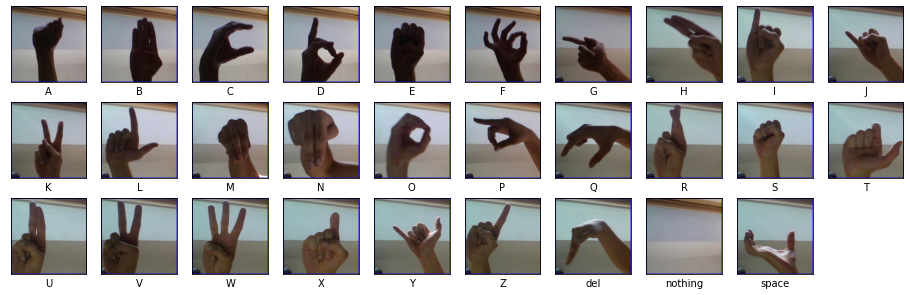

In [7]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

# Data Preprocessing

In [8]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [9]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


# Model Training

In [10]:
classes = 29
batch = 32
epochs = 15
learning_rate = 0.001

In [11]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                        

In [14]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\badda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=5, validation_split=0.2, shuffle = True, verbose=1)


Epoch 1/5
1958/1958 [==============================] - 185s 94ms/step - loss: 0.6089 - accuracy: 0.8154 - val_loss: 1.0700 - val_accuracy: 0.7713
Epoch 2/5
1958/1958 [==============================] - 216s 110ms/step - loss: 0.1286 - accuracy: 0.9604 - val_loss: 2.0751 - val_accuracy: 0.7230
Epoch 3/5
1958/1958 [==============================] - 244s 125ms/step - loss: 0.0925 - accuracy: 0.9736 - val_loss: 0.6840 - val_accuracy: 0.8526
Epoch 4/5
1958/1958 [==============================] - 494s 252ms/step - loss: 0.0675 - accuracy: 0.9814 - val_loss: 0.1828 - val_accuracy: 0.9494
Epoch 5/5
1958/1958 [==============================] - 181s 92ms/step - loss: 0.0642 - accuracy: 0.9844 - val_loss: 0.5037 - val_accuracy: 0.8879


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


272/272 [==============================] - 5s 19ms/step - loss: 0.5202 - accuracy: 0.8868
Test accuracy: 0.886781632900238
Test loss: 0.5202343463897705


# Test Model

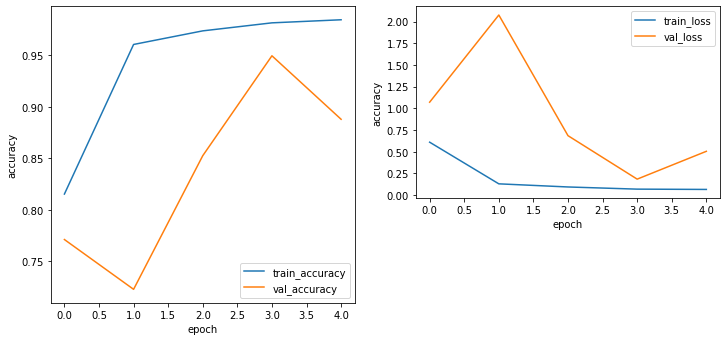

In [17]:
def plot_results(model):
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


    
plot_results(model)

272/272 [==============================] - 5s 20ms/step
Actual [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0.]
Predicted 21


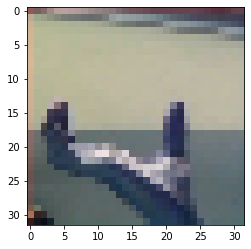

In [21]:
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)

plt.imshow(x_test[0])
print("Actual",y_test[0])
print("Predicted",y_pred[0])


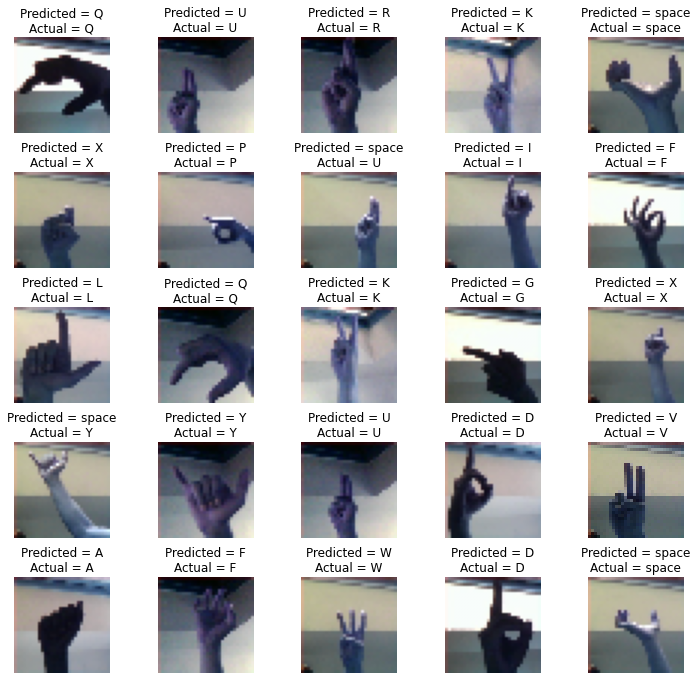

In [19]:
dir_list = os.listdir(train_dir)

fig, a = plt.subplots(5, 5, figsize = (12,12))
a = a.ravel()
test_len = len(x_test)
for i in np.arange(0, 25):
    index = np.random.randint(0, test_len)
    a[i].imshow(x_test[index])
    actual = np.where(y_test[index] == 1)
    
    pred_index = y_pred[index]
    
    a[i].set_title("Predicted = "+ dir_list[pred_index] +"\n"+ "Actual = " + dir_list[actual[0][0]])
    a[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Tasks

# Task 1: Run the above code of classification. 
# Task 2: Perform the FTA(Fault Tree analysis) and design the fault tree for the model called American Sign Language classification. (You can take the example of Fault Tree from the Lecture 12 PPT)
# Task 3: Write the analysis of the code and explanation of fault tree.
# Task 4: Perform any machine learning task and make faule tree analysis for that with explanation of fault tree.